In [76]:
import torch
import matplotlib.pyplot as plt
import numpy as np


## Paso 1. Implementando la función f(x) de forma vectorizada

El primer paso es definir la función que queremos optimizar, $f(\mathbf{x}) = \sin(x_1)\cos(x_2) + \sin(0.5x_1)\cos(0.5x_2)$, de forma vectorizada en PyTorch.

Esto significa que nuestra función debe ser capaz de tomar una matriz de entradas $\mathbf{X}$ (donde cada fila es un punto $\mathbf{x}=(x_1, x_2)$) y devolver un vector de resultados, uno para cada punto. Para lograrlo, utilizamos la indexación `[:, 0]` y `[:, 1]` para acceder a las columnas completas de nuestra matriz de entrada.

In [77]:
def f(x):
  """
  Calcula la función f(x) de forma vectorizada.

  Args:
    x (torch.Tensor): Un tensor de entrada de forma (n, 2).

  Returns:
    torch.Tensor: Un tensor de salida de forma (n,).
  """
  x1 = x[:, 0]
  x2 = x[:, 1]
  return torch.sin(x1) * torch.cos(x2) + torch.sin(0.5 * x1) * torch.cos(0.5 * x2)

## Paso 2. Cálculo del gradiente (hard-coded)

Para el segundo paso, calculamos el **gradiente** de la función $f(\mathbf{x})$ "a mano". El gradiente es un vector que contiene las derivadas parciales de la función con respecto a cada una de sus variables, $x_1$ y $x_2$.

$$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix}
$$

### Derivada Parcial respecto a $x_1$

Para encontrar $\frac{\partial f}{\partial x_1}$, tratamos a $x_2$ como una constante. Usando la regla de la cadena para el segundo término, obtenemos:

$$
\frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1}(\sin(x_1)\cos(x_2)) + \frac{\partial}{\partial x_1}(\sin(0.5x_1)\cos(0.5x_2))
$$
$$
= \cos(x_1)\cos(x_2) + (\cos(0.5x_1) \cdot 0.5)\cos(0.5x_2)
$$
$$
= \cos(x_1)\cos(x_2) + 0.5\cos(0.5x_1)\cos(0.5x_2)
$$

---

### Derivada Parcial respecto a $x_2$

Para encontrar $\frac{\partial f}{\partial x_2}$, tratamos a $x_1$ como una constante. Usando la regla de la cadena para el segundo término, y recordando que la derivada de $\cos(u)$ es $-\sin(u)$, obtenemos:

$$
\frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2}(\sin(x_1)\cos(x_2)) + \frac{\partial}{\partial x_2}(\sin(0.5x_1)\cos(0.5x_2))
$$
$$
= \sin(x_1)(-\sin(x_2)) + \sin(0.5x_1)(-\sin(0.5x_2) \cdot 0.5)
$$
$$
= -\sin(x_1)\sin(x_2) - 0.5\sin(0.5x_1)\sin(0.5x_2)
$$

In [78]:
def grad_f(x):
    """
    Calcula el gradiente de la función f(x) de forma hard-coded.
    
    Args:
        x (torch.Tensor): Un tensor de entrada de forma (n, 2).
    
    Returns:
        torch.Tensor: Un tensor de salida de forma (n, 2) que contiene el gradiente.
    """
    x1 = x[:, 0]
    x2 = x[:, 1]
    
    df_dx1 = torch.cos(x1) * torch.cos(x2) + 0.5 * torch.cos(0.5 * x1) * torch.cos(0.5 * x2)
    df_dx2 = -torch.sin(x1) * torch.sin(x2) - 0.5 * torch.sin(0.5 * x1) * torch.sin(0.5 * x2)
    
    return torch.stack((df_dx1, df_dx2), dim=1)

## Paso 3. Implementación del Algoritmo de Descenso de Gradiente

El **descenso de gradiente** es un algoritmo de optimización iterativo que se utiliza para encontrar el mínimo local de una función. La idea principal es "caminar" cuesta abajo en la superficie de la función, tomando pequeños pasos en la dirección opuesta al gradiente, que es el vector que apunta en la dirección de mayor ascenso.

Los pasos principales del algoritmo son:

1.  **Inicialización:** Se elige un punto de partida inicial de forma aleatoria en el dominio de la función.
2.  **Bucle de Iteración:** Se repite un proceso para un número predefinido de veces:  
    a.  **Cálculo del gradiente:** En la posición actual, se calcula el gradiente de la función.  
    b.  **Actualización de la posición:** La posición actual se ajusta moviéndose en la dirección opuesta al gradiente. La magnitud de este paso está controlada por la **tasa de aprendizaje** (`learning_rate`), que determina qué tan grande es cada "salto".

El proceso se repite hasta que se alcanza un número de iteraciones o la convergencia del algoritmo.

In [79]:
def gradient_descent(start_point, learning_rate, n_iterations):
  """
  Realiza el descenso de gradiente para encontrar el mínimo de una función.

  Args:
    start_point (torch.Tensor): El punto de partida para el descenso.
    learning_rate (float): El tamaño del paso para cada iteración.
    n_iterations (int): El número de iteraciones a realizar.

  Returns:
    list: Una lista que contiene el camino de todos los puntos durante el descenso.
  """
  path = [start_point.squeeze(0)]  # start_point: (1,2) o (2,)
  current_point = start_point
  
  for i in range(n_iterations):
    # Calcula el gradiente en el punto actual
    gradient = grad_f(current_point)
    
    # Actualiza la posición moviéndose en la dirección opuesta al gradiente
    current_point = current_point - learning_rate * gradient
    
    # Almacena el nuevo punto en el camino
    path.append(current_point.squeeze(0)) 
    
  return torch.stack(path)


In [80]:
learning_rate = 0.1
n_iterations = 100

# Punto de partida aleatorio en el rango [0, 10]
start_point = 10 * torch.rand(1, 2, requires_grad=True)

path_of_points = gradient_descent(start_point, learning_rate, n_iterations)

print(f"Punto de partida: {start_point.detach().numpy()}")
print(f"Punto final después de {n_iterations} iteraciones: {path_of_points[-1]}")

Punto de partida: [[6.580398  4.2429023]]
Punto final después de 100 iteraciones: tensor([7.9202, 2.7743], grad_fn=<SelectBackward0>)


### 3.1 Visualización de los caminos del descenso

Para entender mejor cómo funciona el algoritmo de descenso de gradiente, es crucial visualizar su trayectoria. Al graficar el camino que toma nuestro punto de partida, podemos ver cómo se mueve a través de la superficie de la función y si logra converger hacia un mínimo local.

La visualización consiste en dos partes:

1.  **La superficie de la función:** Se crea un "mapa de calor" o gráfico de contorno de la función $f(\mathbf{x})$. Las áreas de color más oscuro representan los "valles" (los mínimos), mientras que las de color más claro son las "cimas" (los máximos).
2.  **El camino del descenso:** Se superpone la trayectoria de los puntos (`path_of_points`) sobre este mapa de calor. Esto nos permite ver visualmente cómo el algoritmo "desciende" la montaña para encontrar el punto más bajo.

In [81]:
n_paths = 100
start_points = 10 * torch.rand(n_paths, 2, requires_grad=True)

all_paths = []

for start_point in start_points:
# `unsqueeze(0)` es necesario para que el tensor tenga la forma (1, 2)
    path = gradient_descent(start_point.unsqueeze(0), learning_rate, n_iterations)
    all_paths.append(path)

In [82]:
def plot_paths(paths, function, show_legend=True):
    """
    Visualiza la superficie de la función y los caminos del descenso de gradiente.
    Si show_legend es False, no se muestra la leyenda.
    """
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    points_for_plot = np.stack([X.ravel(), Y.ravel()], axis=1)
    Z = function(torch.tensor(points_for_plot, dtype=torch.float32)).numpy()
    Z = Z.reshape(X.shape)

    plt.figure(figsize=(8, 5))
    contour = plt.contourf(X, Y, Z, levels=60, cmap='viridis', alpha=0.85)
    plt.colorbar(contour, label='Valor de la función f(x, y)')

    plt.title('Descenso de Gradiente desde Múltiples Puntos de Partida', fontsize=10)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)

    for i, path in enumerate(paths):
        path = path.detach().numpy()
        mask = np.all((path >= 0) & (path <= 10), axis=1)
        path = path[mask]
        if len(path) == 0:
            continue
        plt.plot(path[:, 0], path[:, 1], '-', lw=2, label=f'Camino {i+1}' if show_legend else None)
        plt.scatter(path[0, 0], path[0, 1], c='lime', s=80, marker='o', edgecolor='black',
                    label=f'Inicio {i+1}' if (i == 0 and show_legend) else None)
        plt.scatter(path[-1, 0], path[-1, 1], c='red', s=80, marker='*', edgecolor='black',
                    label=f'Fin {i+1}' if (i == 0 and show_legend) else None)

    if show_legend:
        plt.legend(loc='upper right', fontsize=12, frameon=True)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

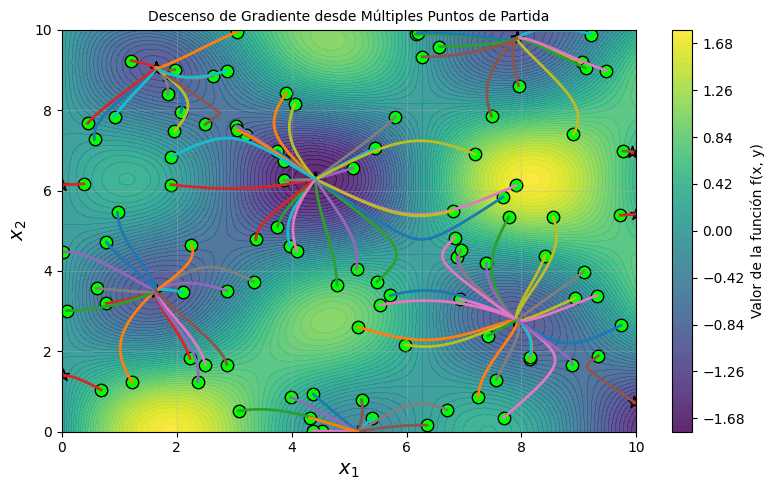

In [83]:
plot_paths(all_paths, f, show_legend=False)


## Paso 4. Descenso de Gradiente con Momento (Momentum)
El descenso de gradiente con momento es una extensión del algoritmo básico. Su propósito es acelerar la convergencia y ayudar a la optimización a superar los mínimos locales y las oscilaciones.

Imagina que el descenso de gradiente básico es como una pelota que desciende una colina. En cada paso, la pelota solo mira la pendiente justo debajo de ella y se mueve en esa dirección.

El momento, en cambio, le da a la pelota inercia. Esto significa que la dirección de su movimiento no solo depende del gradiente actual, sino también de la dirección en la que venía. Este "impulso" ayuda a la pelota a:

- **Acelerar** en las direcciones consistentes, haciendo que el camino hacia el mínimo sea más rápido.

- **Suavizar** las oscilaciones y los "baches" en el camino, ya que el impulso la ayuda a pasar por encima de ellos.

La implementación del momento añade un nuevo término, la velocidad, que es una media ponderada de los gradientes pasados.



In [93]:
def gradient_descent_with_momentum(start_point, learning_rate, n_iterations, momentum_rate):
  """
  Realiza el descenso de gradiente con un término de momento.

  Args:
    start_point (torch.Tensor): El punto de partida.
    learning_rate (float): Tasa de aprendizaje (alpha).
    n_iterations (int): Número de iteraciones.
    momentum_rate (float): Coeficiente de momento (beta).
  
  Returns:
    numpy.ndarray: Un array con la trayectoria de los puntos.
    numpy.ndarray: Un array con la norma de los gradientes en cada paso.
  """
  path = [start_point.squeeze(0)]
  gradient_norms = []
  
  current_point = start_point
  velocity = torch.zeros_like(current_point)
  
  for i in range(n_iterations):
    # Calcula el gradiente
    gradient = grad_f(current_point)
    
    # Actualiza la velocidad
    velocity = momentum_rate * velocity + learning_rate * gradient
    
    # Actualiza la posición
    current_point = current_point - velocity
    
    # Almacena el nuevo punto
    path.append(current_point.squeeze(0))
    
    # Almacena la norma del gradiente
    gradient_norms.append(torch.linalg.norm(gradient).item())
    
  return torch.stack(path), np.array(gradient_norms)


El **Momento** es una técnica que acelera el descenso de gradiente al incorporar la historia de los gradientes anteriores. Es como darle inercia a una pelota que rueda cuesta abajo, lo que le ayuda a seguir moviéndose en la misma dirección, superando pequeños baches u oscilaciones en el camino y acelerando la convergencia en valles estrechos.

* **Velocidad ($v$):** Un nuevo vector que acumula la información de los gradientes pasados.
* **Tasa de Momento ($\beta$):** Un hiperparámetro, generalmente entre 0 y 1, que determina cuánta "inercia" se transfiere de un paso al siguiente.
* **Actualización con momento:** La posición se actualiza en dos pasos:
  1.  **Actualizar la velocidad:**
      $v_{t} = \beta v_{t-1} + \alpha \nabla f(\mathbf{x}_{t-1})$
  2.  **Actualizar la posición:**
      $\mathbf{x}_{t} = \mathbf{x}_{t-1} - v_{t}$


In [96]:
n_paths = 10
start_points = 10 * torch.rand(n_paths, 2, requires_grad=True)
momentum = 0.9

all_paths = []

for start_point in start_points:
# `unsqueeze(0)` es necesario para que el tensor tenga la forma (1, 2)
    path, grad_norms = gradient_descent_with_momentum(start_point.unsqueeze(0), learning_rate, n_iterations, momentum)
    all_paths.append(path)


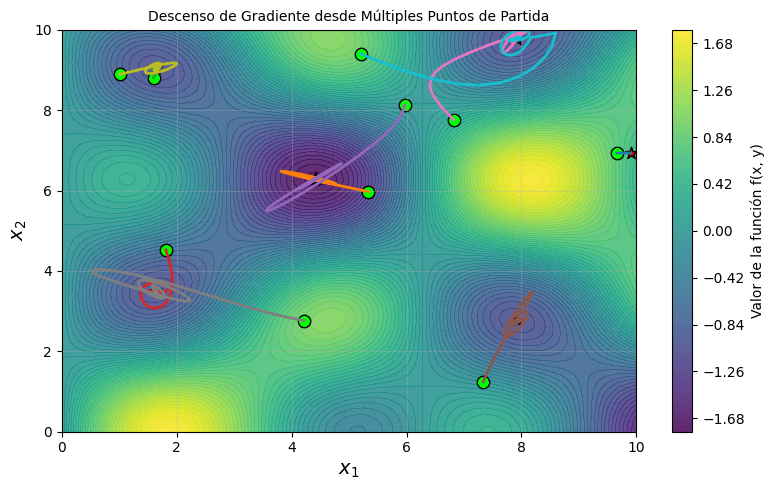

In [97]:
plot_paths(all_paths, f, show_legend=False)

La **norma del gradiente** es una medida de la magnitud del gradiente. En el contexto de la optimización, nos indica qué tan empinada es la pendiente en la posición actual.

* **Convergencia:** Durante el descenso de gradiente, la norma del gradiente debería tender a cero a medida que el algoritmo se acerca a un mínimo. Graficar esta norma a lo largo de las iteraciones es una excelente manera de visualizar la velocidad de convergencia del algoritmo.


In [100]:
def plot_gradient_norms(norm_data, labels, title):
  """
  Visualiza la norma del gradiente a lo largo de las iteraciones.

  Args:
    norm_data (list): Una lista de arrays de NumPy con las normas de los gradientes.
    labels (list): Una lista de etiquetas para la leyenda.
    title (str): El título del gráfico.
  """
  plt.figure(figsize=(5, 3))
  for norms, label in zip(norm_data, labels):
    plt.plot(norms, label=label)
  
  plt.title(title)
  plt.xlabel('Iteraciones')
  plt.ylabel('Norma del gradiente')
  plt.legend()
  plt.grid(True)
  plt.show()

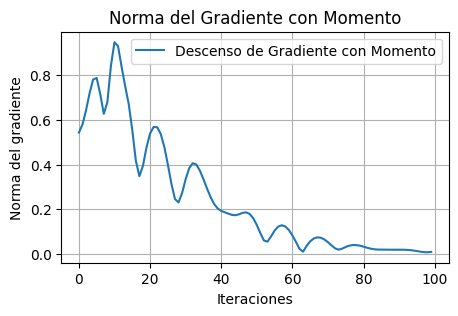

In [101]:
plot_gradient_norms([grad_norms], ['Descenso de Gradiente con Momento'], 'Norma del Gradiente con Momento')